Jade AMRAOUI & Julie BONNASSIEUX

<h3>Algorithmic Machine Learning Challenge 3</h3>
<h1>Anomaly Detection</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>
<i>3<sup>th</sup> May 2019</i>

Anomaly detection (AD) refers to the process of detecting data points that do not conform with the rest of observations. Applications of anomaly detection include fraud and fault detection, surveillance, diagnosis, data cleanup, predictive maintenance.

When we talk about AD, we usually look at it as an unsupervised (or semi-supervised) task, where the concept of anomaly is often not well defined or, in the best case, just few samples are labeled as anomalous. In this challenge, you will look at AD from a different perspective!

The dataset you are going to work on consists of monitoring data generated by IT systems; such data is then processed by a monitoring system that executes some checks and detects a series of anomalies. This is a multi-label classification problem, where each check is a binary label corresponding to a specific type of anomaly. Your goal is to develop a machine learning model (or multiple ones) to accurately detect such anomalies.

This will also involve a mixture of data exploration, pre-processing, model selection, and performance evaluation. You will also be asked to try one or more rule learning models, and compare them with other ML models both in terms of predictive performances and interpretability. Interpreatibility is indeed a strong requirement especially in applications like AD where understanding the output of a model is as important as the output itself.

Please, bear in mind that the purpose of this challenge is not simply to find the best-performing model. You should rather make sure to understand the difficulties that come with this AD task.

# Overview
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

<div class="">
    <h3>3. Model Selection</h3>
</div>

At this point, you should have a good understanding of the dataset, and have an idea about the possible candidate models. For example, you may try a multi-label classification model to predict all classes at ones, or train different models, one for each label. In any case, it is important to justify your choices and make a comparison among the candidate models.

You are free to choose any model you want, but you should be aware about some factors which may influence your decision:

- What is the model's complexity?
- Is the model interpretable?
- Is the model able to handle imbalanced datasets?
- Is the model capable of handling both numerical and categorical data?
- Is the model able to handle missing values?
- Does the model return uncertainty estimates along with predictions?

An in-depth evaluation of competing models in view of this and other criteria will elevate the quality of your submission and earn you a higher grade. You may also try to build new labels by combining one or more labels (for example by doing an OR) and check if this impacts the performance of the model(s).

<div class="">
    <h4>3.1 Interpretable Models</h3>
</div>

Being able to understand the output of a model is important in many field, especially in anomaly detection. In linear regression, for example, the weights of the model can provide some hints on the importance of features, and this is a form of interpretability. Here, we focus on Rule learning, a specific field of interpretable machine learning that provides interpretability through the use of rules. Examples of rule-based models are: 

- RIPPER
    - [Main Paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.107.2612&rep=rep1&type=pdf)
    - A fast and reliable implementation is JRIP by [WEKA](https://www.cs.waikato.ac.nz/~ml/weka/). You can also find unofficial python implementations on GitHub.
- Bayesian Rule Sets (BRS)
    - [Main Paper](http://jmlr.org/papers/volume18/16-003/16-003.pdf)
    - You can find a good implementation [here](https://pypi.org/project/ruleset/). You will probably need to install "fim" (pip install fim) before installing BRS.
- Scalable Bayesian Rule Lists (SBRL)
    - [Main Paper](https://arxiv.org/pdf/1602.08610.pdf)
    - You can find a good implementation [here](https://github.com/myaooo/pysbrl). You will probably need to install "fim" (pip install fim) before installing SBRL.
- and so on... 

Try to run at least one of the suggested models (you are free to try others as well) and comment:

- Are rule-learning models able to provide the same predictive performances as previously tested models?
- Are they faster or slower to train?
- Do learned rules look meaningful to you?
- How many rules do these models learn?
- How many conditions/atoms have on average?

<b>N.B.</b> Since most of the rule-learning implementations deal with binary labels, you can train the model to predict one label of your choice.

<div class="">
    <h2>Submission Instructions</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;" />    
</div>

- The goal of this challenge is to construct one or more models to detect anomalies.
- Your submission will be the <b>HTML version of your notebook</b> exploring the various modelling aspects described above.

# **1. Data Exploration**
*Content*
* Data import
* Data casting
* Data cleaning
* Data visualisation
    * Distribution of values
    * Correlations of data columns with targeted columns

---
## Data import
---

In [2]:
! ls /mnt/datasets/anomaly

data.csv


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd

#when first reading the .csv file, we figure out it didn't contain in itself the column's names, 
#so we have to precise it now
names = ['SessionNumber', 'SystemID', 'Date', 'HighPriorityAlerts', 'Dumps', 'CleanupOOMDumps', 'CompositeOOMDums',
        'IndexServerRestarts', 'NameServerRestarts', 'XSEngineRestarts', 'PreprocessorRestarts', 'DaemonRestarts', 
        'StatisticsServerRestarts','CPU', 'PhysMEM', 'InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit', 'ColumnUnloads',
        'DeltaSize', 'MergeErrors', 'BlockingPhaseSec', 'Disk', 'LargestTableSize', 'LargestPartitionSize', 'DiagnosisFiles',
        'DiagnosisFilesSize', 'DaysWithSuccessfulDataBackups', 'DaysWithSuccessfulLogBackups', 'DaysWithFailedDataBackups',
        'DaysWithFailedfulLogBackups', 'MinDailyNumberOfSuccessfulDataBackups', 'MinDailyNumberOfSuccessfulLogBackups',
        'MaxDailyNumberOfFailedDataBackups', 'MaxDailyNumberOfFailedLogBackups', 'LogSegmentChange', 
        'Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']

df = pd.read_csv('/mnt/datasets/anomaly/data.csv',
                    sep=';',
                    header=None,
                    names=names)

df.head(2)

SessionNumber  SystemID              Date  HighPriorityAlerts  Dumps  \
0              0         0  16/01/2017 04:04                   1    0.0   
1              1         1  06/02/2017 04:03                   0    0.0   

   CleanupOOMDumps  CompositeOOMDums  IndexServerRestarts  NameServerRestarts  \
0              0.0               0.0                    0                   0   
1              0.0               0.0                    0                   0   

   XSEngineRestarts   ...    MaxDailyNumberOfFailedLogBackups  \
0                 0   ...                                   0   
1                 0   ...                                   0   

   LogSegmentChange  Check1  Check2  Check3  Check4  Check5  Check6  Check7  \
0               0.0     0.0     0.0     0.0     NaN     NaN     0.0     0.0   
1               0.0     0.0     0.0     0.0     NaN     NaN     0.0     0.0   

   Check8  
0     0.0  
1     0.0  

[2 rows x 44 columns]

## Data casting
---

Exceptionally, we will cast a column format during the **Data Exploration** phase. We dedicate this section to the conversion of the *Date* column into something we can work with. We've decided to go for integers : for instance, the string `06/02/2017 04:33` will be transformed into the integer `201702060433`. This format has the advantage of permitting a proper temporal comparison.

In [2]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')
df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y%m%d%H%M'))
df['Date'] = df['Date'].astype('int', errors='raise') 

## Data cleaning
---

To be more precise, in this section we will **check for errors in the dataset**. We know there should be some constraints on the columns of our DataFrame. For instance :
* The columns *MergeErrors*, *Check1*, *Check2*, *Check3*, *Check4*, *Check5*, *Check6*, *Check7* & *Check8* should contain booleans, or at least only 0 and 1,
* The columns *CPU*, *PhysMEM*, *InstanceMEM*, *TablesAllocation*, *IndexServerAllocationLimit* & *Disk* should contain floats between 0 and 100.

### ***Constaint on booleans***
Let's check if the 1st contraint is respected.

In [3]:
col_constraint1 = ['MergeErrors', 'Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6',
                   'Check7', 'Check8']

for col in col_constraint1 :
    q = df.query(col +'!= 1 &'+ col +' != 0')
    q = q.dropna(subset=[col])
    num_probs = len(q)
    print('The column ', col,' contains ', num_probs, ' problematic values.')
    if (num_probs > 0) :
        print('Here are some of them :')
        print(q[col][0:5])

The column  MergeErrors  contains  0  problematic values.
The column  Check1  contains  0  problematic values.
The column  Check2  contains  0  problematic values.
The column  Check3  contains  0  problematic values.
The column  Check4  contains  0  problematic values.
The column  Check5  contains  0  problematic values.
The column  Check6  contains  0  problematic values.
The column  Check7  contains  0  problematic values.
The column  Check8  contains  0  problematic values.


There is no problem with the constraint on the booleans values. Let's check if the 2nd contraint is respected.

#### ***Constraint on floats in [0 ; 100]***

In [4]:
col_constraint2 = ['CPU', 'PhysMEM', 'InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit', 'Disk']

for col in col_constraint2 :
    q = df.query(col +'> 100 |'+ col +' < 0')
    num_probs = len(q)
    print('The column ', col,' contains ', num_probs, ' problematic values.')
    if (num_probs > 0) :
        print('Here are some of them :')
        print(q[col][0:5])
    print()

The column  CPU  contains  9  problematic values.
Here are some of them :
29880      119.75
91043     1135.66
118084     363.55
118085     363.55
158044    4602.49
Name: CPU, dtype: float64

The column  PhysMEM  contains  31  problematic values.
Here are some of them :
156807    502865.23
156808    502865.23
156809    507775.16
156810    509430.50
156842    518671.20
Name: PhysMEM, dtype: float64

The column  InstanceMEM  contains  0  problematic values.

The column  TablesAllocation  contains  0  problematic values.

The column  IndexServerAllocationLimit  contains  0  problematic values.

The column  Disk  contains  188  problematic values.
Here are some of them :
474     3.198910e+14
475     3.271972e+14
2759    2.834175e+14
2760    2.935822e+14
2761    3.030000e+14
Name: Disk, dtype: float64



So we don't have any issue with *InstanceMEM*, *TablesAllocation* & *IndexServerAllocationLimit*. 

However, we have values that do not respect the constraint in *CPU*, *PhysMEM* & *Disk*. The problem with such values is that we don't know if they are errors of insertion or indices of anomalies, so dealing with them is tricky. Indeed:
* If they are errors of insertion and we let them in the dataset, they will act like a noise and distrub our prediction. It is all the more true for *Disk* and it's values around ${ 10 }^{ 14 }$, as the later normalization will squash the true data.
* If they are indices of anomalies and we drop them, we simply loose usefull information for our prediction.

Regarding those two possibilities, we have decided to create another DataFrame `clean_df` to take all these wrong values and to rescale them between 100 and 200. As a consequence, we don't loose them, we don't loose how they are distributed among themselves, and we prevent them to squash too much the ones between 0 and 100 in a later normalization.

In [5]:
from sklearn import preprocessing

clean_df = df
col_constraint2bis = ['CPU', 'PhysMEM', 'Disk']

for col in col_constraint2bis :
    q = df.query(col +'> 100 |'+ col +' < 0')
    q = q.drop(df.columns.drop(col), axis=1)
    q_norm = preprocessing.normalize(q, norm='l2', return_norm=False, axis=0)  #having them in [0,1]
    for i in range(len(q_norm)):
        clean_df.at[q.index[i], col] = q_norm[i][0]*100 + 100  #rescaling them in [100,200]

So, just to verify :

In [6]:
for col in col_constraint2bis :
    q = clean_df.query(col +'> 100 |'+ col +' < 0')
    print(q[col].describe())
    print()  

count      9.000000
mean     120.058217
std       28.237854
min      101.501604
25%      101.797991
50%      105.458534
75%      117.051407
max      169.104247
Name: CPU, dtype: float64

count     31.000000
mean     114.675800
std       10.524966
min      100.001281
25%      106.583290
50%      106.760449
75%      125.672570
max      126.351365
Name: PhysMEM, dtype: float64

count    188.000000
mean     104.757158
std        5.542956
min      100.026706
25%      100.303167
50%      101.441797
75%      109.364287
max      116.306350
Name: Disk, dtype: float64



As expected, all values are below 200. For the following, we'll work with `clean_df`.

## Data visualisation
---
#### ***Distribution of values***

Let's visualize the distribution of values column per column for `clean_df`, by plotting their Empirical Cumulative Distribution Function;

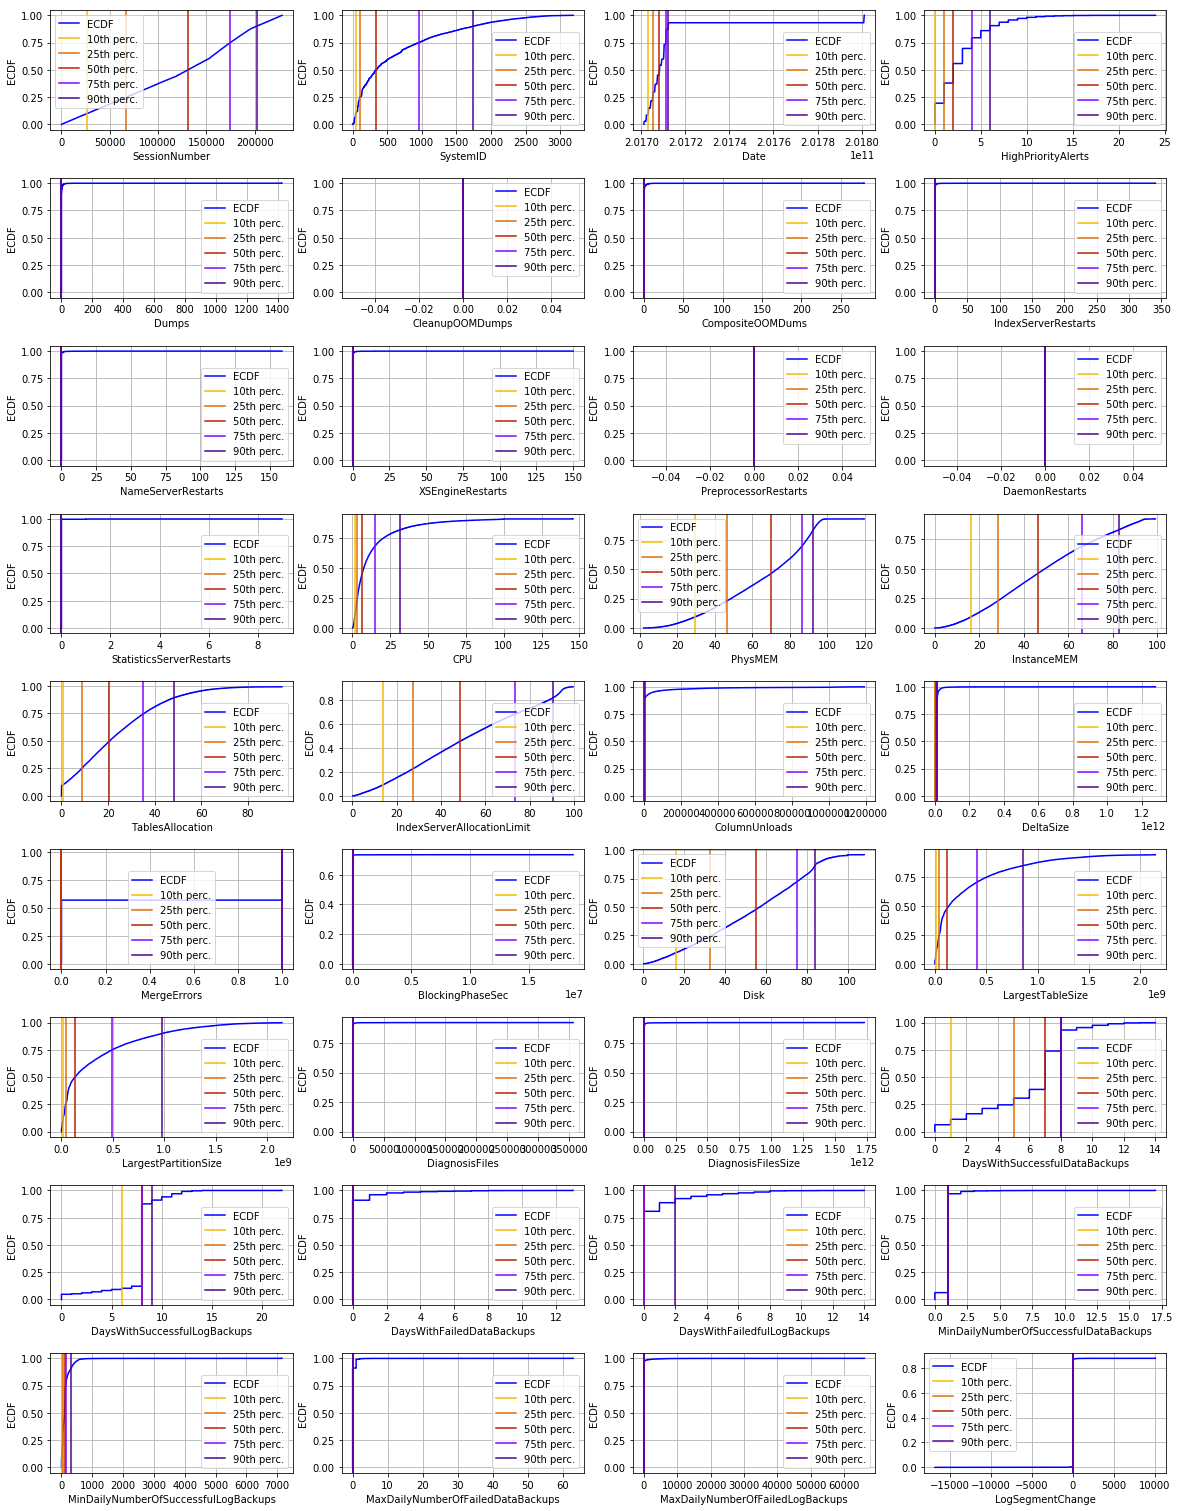

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

col_names = clean_df.columns.drop(['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8'])

figsize = (20, 30)
cols = 4
gs = gridspec.GridSpec(len(col_names) // cols + 1, cols)
gs.update(hspace=0.4)
cmap = plt.get_cmap('gnuplot')

fig1 = plt.figure(num=1, figsize=figsize)
ax = []
for i, colum in enumerate(col_names):
    row = (i // cols)
    col = i % cols
    ax.append(fig1.add_subplot(gs[row, col]))
    
    # Plot the cumulative distribution
    ser1 = clean_df[colum].sort_values(ascending=True)
    cum_dist1 = np.linspace(0.,1.,len(ser1))
    ser_cdf1 = pd.Series(cum_dist1, index=ser1)
    ser_cdf1.plot(drawstyle='steps', color='b', label='ECDF', ax=ax[-1])

    # Calculate and plot the 5 important percentiles
    for i, quantile in enumerate([.1, 0.25, .5, .75, .9]):
        ax[-1].axvline(clean_df[colum].quantile(quantile), label='%.0fth perc.' % (quantile*100), color=cmap(1-quantile))
    ax[-1].set_ylabel('ECDF')
    ax[-1].legend()
    ax[-1].grid()

plt.show()

There's a lot of thing to discuss from this huge plot.

Firstly, there 3 ECDF that seems quite confusing : for *CleanupOOMDumps*, *PreprocessorRestarts* & *DaemonRestarts*, it doesn't look like a  Heaviside step function, but like the graphical represention of x=0. Let's see the values in these columns.

In [27]:
print("The columns CleanupOOMDumps contains the following values : ", clean_df['CleanupOOMDumps'].unique())
print("The columns PreprocessorRestarts contains the following values : ", clean_df['PreprocessorRestarts'].unique())
print("The columns DaemonRestarts contains the following values : ", clean_df['DaemonRestarts'].unique())

The columns CleanupOOMDumps contains the following values :  [ 0. nan]
The columns PreprocessorRestarts contains the following values :  [0]
The columns DaemonRestarts contains the following values :  [0]


As these columns only contain the value `0` repeated a lot of time (or NaNs), it's normal their ECDF plot are so pecular. They don't bring any information, we'll simply drop them later in the **Data Preprocessing** part.

Then we have the plots of *Dumps*, *CompositeOOMDums*, *IndexServerRestarts*, *NameServerRestarts*, *XSEngineRestarts*, *StatisticsServerRestarts*, *ColumnUnloads*, *DeltaSize*, *BlockingPhaseSec*, *DiagnosisFiles*, *DiagnosisFilesSize*, *MinDailyNumberOfSuccessfulDataBackups*, *MaxDailyNumberOfFailedDataBackups*, *MaxDailyNumberOfFailedLogBackups* & *LogSegmentChange*, that all look the same. Looking at their ECDF, it seems that those columns contain a lot of `0`, but also other values. In that case, having a values different from `0` might help us to determine if an anomaly occured or not somewhere in the IT system!

Finally, all the other plots show percentiles that are not superposed on each other, which means that the data is quite distributed. We'll see how well our future models will manage the info contained in these columns.

#### ***Correlations of data columns with targeted columns***

In [8]:
corr = clean_df.corr()
corr = corr.drop(clean_df.columns.drop(['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']))

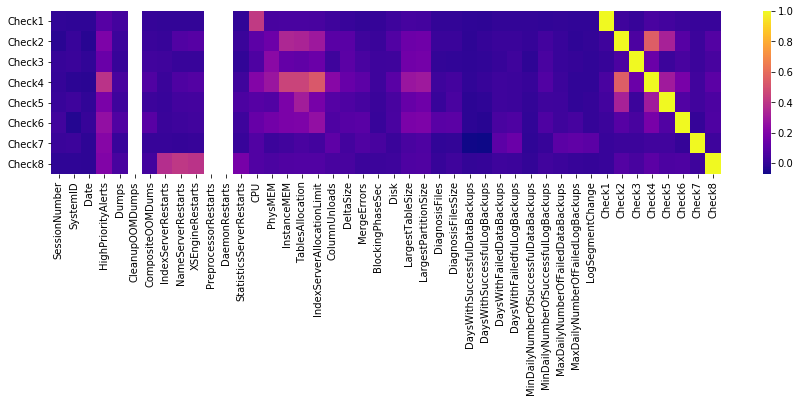

In [29]:
import seaborn as sns


figure = plt.figure(figsize=(15,3))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8'],
            cmap='plasma')

We can conclude from this that we were certainly right about the columns *CleanupOOMDumps*, *PreprocessorRestarts* & *DaemonRestarts* : pandas is not able to calculate a correlation for these columns, that contain only `0` or NaNs.

Plus, we see that some data columns seems highly correlated to our targeted ones. For instance, we can hope that *HighPriorityAlert* will be usefull for the prediction of *Check4*, as it corresponds to a pink cell in the heatmap above. The same goes for *CPU* & *Check1* or *XSEngineRestarts* & *Check8*.

---
# **2. Data Pre-processing**
*Content*
- Handling missing information in the dataset
- Carrying out feature selection
- Normalization of the data
- Preparation of the diverse datasets

---

## Handling missing information in the dataset

First things first : is there any NaN in here?

In [7]:
if(clean_df.isna().any().any()): #if there are NaN
    print("There are", clean_df.isna().any().sum(), "colums with NaN.")
else:
    print("no NaN here")

There are 25 colums with NaN.


Okay, not very good news. How many NaN per columns ?

In [8]:
#to check for NaN in the DataFrame
missing_values_count = clean_df.isna().sum()
missing_values_count

SessionNumber                                0
SystemID                                     0
Date                                         0
HighPriorityAlerts                           0
Dumps                                        3
CleanupOOMDumps                              3
CompositeOOMDums                             3
IndexServerRestarts                          0
NameServerRestarts                           0
XSEngineRestarts                             0
PreprocessorRestarts                         0
DaemonRestarts                               0
StatisticsServerRestarts                     0
CPU                                      25209
PhysMEM                                  20567
InstanceMEM                              22117
TablesAllocation                          2290
IndexServerAllocationLimit               26444
ColumnUnloads                                0
DeltaSize                                  206
MergeErrors                               7733
BlockingPhase

So among these 25 columns with NaNs, the 8 last are our targeted labels, so we won't preprocess them for now. Then we have the *Dumps*, *CleanupOOMDumps* & *CompositeOOMDums* columns that all have 3 NaNs. 3 NaN out of 287031 rows is nothing, so we can use the "quick and dirty" `dropna()` method.

In [9]:
clean_df = clean_df.dropna(subset=['Dumps']) #dropping the rows that contains NaN in the Dumps column
missing_values_count = clean_df.isna().sum()
missing_values_count

SessionNumber                                0
SystemID                                     0
Date                                         0
HighPriorityAlerts                           0
Dumps                                        0
CleanupOOMDumps                              0
CompositeOOMDums                             0
IndexServerRestarts                          0
NameServerRestarts                           0
XSEngineRestarts                             0
PreprocessorRestarts                         0
DaemonRestarts                               0
StatisticsServerRestarts                     0
CPU                                      25206
PhysMEM                                  20564
InstanceMEM                              22114
TablesAllocation                          2290
IndexServerAllocationLimit               26444
ColumnUnloads                                0
DeltaSize                                  203
MergeErrors                               7733
BlockingPhase

Moreover, all the 3 NaN in columns *CleanupOOMDumps* and *CompositeOOMDums* disappeared with the ones from *Dumps*. This goes in the sense that using the non subtil `dropna()` method here is not so harmful.

However, we have now 14 other columns which contain more than 100 NaNs and we have to clean them.  Simply discarding entire rows and/or columns containing missing values - as we just did for 3 rows - comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.


We first retrieve the names of all columns containing NaN values :

In [10]:
missing_values_count = clean_df.isna().any()
col_nan =[]

for i in range(len(missing_values_count.values)) :
    if missing_values_count.values[i] == True :
        col_nan.append(missing_values_count.index[i])

print('Colomns with NaN values : ', col_nan)

Colomns with NaN values :  ['CPU', 'PhysMEM', 'InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit', 'DeltaSize', 'MergeErrors', 'BlockingPhaseSec', 'Disk', 'LargestTableSize', 'LargestPartitionSize', 'DiagnosisFiles', 'DiagnosisFilesSize', 'LogSegmentChange', 'Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']


In order to handle NaN values for the rest of the columns (containing a large number of missing values), two major techniques can be applied :
- **the univariate feature imputation**, missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 
- **the multivariate feature imputation**, which models each feature with missing values as a function of other features

To make the optimal choice, we have chosen to look closer to the data. Indeed, for the multivariate feature imputation, we need to have enough information in the given data regarding the missing values in order to minimize the standard errors.
That's why we had a look to the correlation scores between all variables.

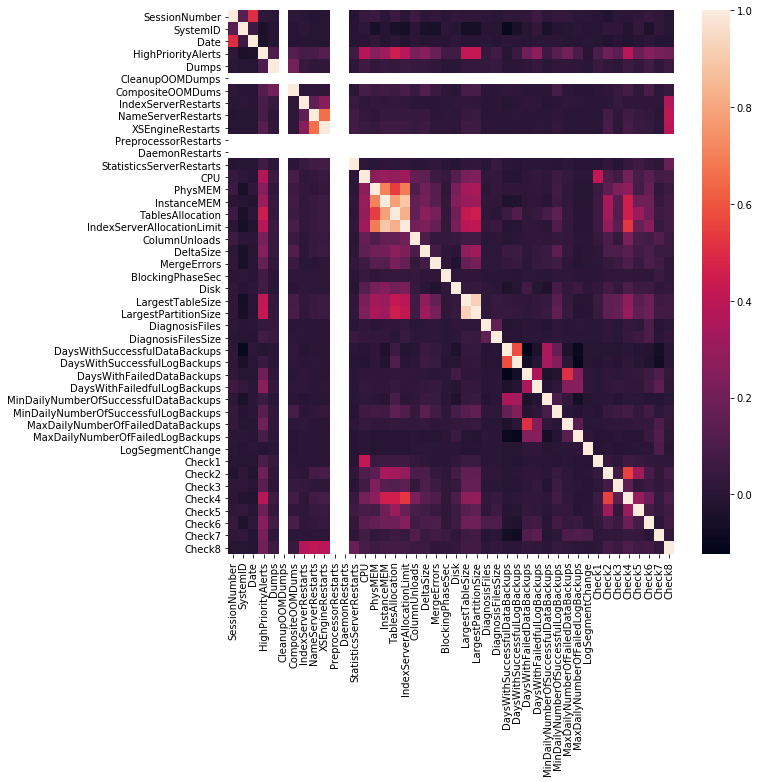

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(10,10))

corr = clean_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

What we can see is that there is very few correlation between variables except for two groups containing NaN values. This leads us to choose different imputing strategies depending on the considered columns.

Within all the columns containing NaN values, only one is of boolean type (the others are floats or integers) : for this one, `MergeErrors`, we have chosen to use the univariate feature imputation using the most frequent appearing value.

In [11]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
import numpy as np
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=np.nan, strategy="most_frequent", axis=0)
clean_df["MergeErrors"] = imp.fit_transform(clean_df[["MergeErrors"]]).ravel()

For the columns `CPU` ,`IndexServerAllocationLimit` ,`DeltaSize` ,`BlockingPhaseSec` ,`Disk` ,`DiagnosisFiles` ,`DiagnosisFilesSize` , we also perform univariate feature imputation but using the mean value of the column.

In [13]:
col_mean = ['CPU','IndexServerAllocationLimit','DeltaSize','BlockingPhaseSec','Disk','DiagnosisFiles','DiagnosisFilesSize']

for col in col_mean :
    imp = Imputer(missing_values=np.nan, strategy="mean", axis=0)
    clean_df[col] = imp.fit_transform(clean_df[[col]]).ravel()

For the two following groups :
- `PhysMEM`, `InstanceMEM`  and `TablesAllocation`
- `LargestTableSize` and `LargestPartitionSize`

We have chosen to apply the multivariate feature imputation to take into account the information from the other features (as they are quite highly correlated with each other).

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_imp = clean_df.drop(['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8'],axis=1)
imp = IterativeImputer(max_iter=10, random_state=0)
X = imp.fit_transform(df_imp)

In [15]:
print(X.shape)

(287028, 36)


The result of the IterativeImputer function is an object X whose columns correspond to the columns of the entire dataframe df (the columns which don't contain any Nan are unchanged). In order to retrieve the values imputed in the dataframe, it is better to work with the transpose of X in which X[i] correspond to the ith column of the dataframe.

In [16]:
columns = list(clean_df.columns)
col_unchanged = ['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']
for col in col_unchanged :
    columns.remove(col)

Xt = X.transpose()
for i in range(len(columns)) :
    clean_df[columns[i]] = Xt[i]

In [17]:
clean_df.isna().any()

SessionNumber                            False
SystemID                                 False
Date                                     False
HighPriorityAlerts                       False
Dumps                                    False
CleanupOOMDumps                          False
CompositeOOMDums                         False
IndexServerRestarts                      False
NameServerRestarts                       False
XSEngineRestarts                         False
PreprocessorRestarts                     False
DaemonRestarts                           False
StatisticsServerRestarts                 False
CPU                                      False
PhysMEM                                  False
InstanceMEM                              False
TablesAllocation                         False
IndexServerAllocationLimit               False
ColumnUnloads                            False
DeltaSize                                False
MergeErrors                              False
BlockingPhase

All the NaN values has been inferred or removed of the dataset except for the checks for which we will proceed differently.

* **Handling missing values in the check columns**

The values (0 or 1) contained in the checks columns are labels which give information about the type of anomaly detected. Sometimes, the information isn't available, that's why there are NaN values. 
Several strategies can be taken to deal with this missing information :

* by making one-by-one prediction on each of the check columns, we can remove the NaN values of the predicted column and work with resulting labelled data. As the proportion of NaN in each column is less than 15% of the dataset, it seems acceptable to drop it.

* by making multilabel prediction, we can use default labels to replace all the NaN values. 

In [18]:
col_check = ['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']

clean_df_ch = clean_df.dropna(subset=col_check) 
missing_values_count = clean_df_ch.isna().sum()
print('We remove', 100 - 100*(clean_df_ch['SystemID'].count()/clean_df['SystemID'].count()), '% of the data.')

We remove 17.565882074222728 % of the data.


## Carrying out feature selection
---

Within all the features on which we are currently working on, some seem not to give any further information, as seen in the Data Exploration, and can be removed.
Those columns, containing only zeros, have been identified in the previous part : *CleanupOOMDumps*, *PreprocessorRestarts* and *DaemonRestarts*.

In [19]:
clean_df = clean_df.drop(['CleanupOOMDumps', 'PreprocessorRestarts','DaemonRestarts'], axis=1)

In [20]:
clean_df.columns

Index(['SessionNumber', 'SystemID', 'Date', 'HighPriorityAlerts', 'Dumps',
       'CompositeOOMDums', 'IndexServerRestarts', 'NameServerRestarts',
       'XSEngineRestarts', 'StatisticsServerRestarts', 'CPU', 'PhysMEM',
       'InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit',
       'ColumnUnloads', 'DeltaSize', 'MergeErrors', 'BlockingPhaseSec', 'Disk',
       'LargestTableSize', 'LargestPartitionSize', 'DiagnosisFiles',
       'DiagnosisFilesSize', 'DaysWithSuccessfulDataBackups',
       'DaysWithSuccessfulLogBackups', 'DaysWithFailedDataBackups',
       'DaysWithFailedfulLogBackups', 'MinDailyNumberOfSuccessfulDataBackups',
       'MinDailyNumberOfSuccessfulLogBackups',
       'MaxDailyNumberOfFailedDataBackups', 'MaxDailyNumberOfFailedLogBackups',
       'LogSegmentChange', 'Check1', 'Check2', 'Check3', 'Check4', 'Check5',
       'Check6', 'Check7', 'Check8'],
      dtype='object')

## Normalization of the data
---

In [21]:
from sklearn import preprocessing

clean_df_norm = clean_df.drop(['Date', 'Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8'],axis=1)

Xnorm, norms = preprocessing.normalize(clean_df_norm, norm='l2', return_norm=True, axis=0)

In [22]:
columns = list(clean_df.columns)
Xnormt = Xnorm.transpose()

# We don't want to normalize the boolean columns of the dataframe, so we removed them
for col in ['Date', 'Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']:
    columns.remove(col)
    
#We create the dataframe with the normalized values   
for i in range(len(columns)) :
    clean_df_norm[columns[i]] = Xnormt[i]

#We add the missing columns
for col in ['Date', 'Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']:
    clean_df_norm[col] = clean_df[col]

## Preparation of the diverse datasets
---

As explained in the 'Handling missing information' part, regarding a one-by-one or multilabel predictions, we need to work with different types of datasets.
Here we are bulding 9 new dataframes : 

* the eight first for a one-by-one prediction, where all NaN values are removed successively of each column to be predicted and the NaN of other checks replace by a default value.
* the ninth replace all NaN values by a defaul label (let's say -1) and keeps all lines.

In [24]:
from sklearn.model_selection import train_test_split

#We replace all NaN values by -1
df9 = clean_df_norm.replace(to_replace=np.nan, value=-1)
X9 = df9.drop(['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8'], axis=1)
y9 = df9[['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']]

Xnorm_train9, Xnorm_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.2, random_state=42)


#Creation of the 8 first dataframes for one-by-one prediction
df1 = df9[df9['Check1'] != -1]
X1 = df1.drop(['Check1'],axis=1)
y1 = df1['Check1']
Xnorm_train1, Xnorm_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

df2 = df9[df9['Check2'] != -1]
X2 = df2.drop(['Check2'],axis=1)
y2 = df2['Check2']
Xnorm_train2, Xnorm_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

df3 = df9[df9['Check3'] != -1]
X3 = df3.drop(['Check3'],axis=1)
y3 = df3['Check3']
Xnorm_train3, Xnorm_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

df4 = df9[df9['Check4'] != -1]
X4 = df4.drop(['Check4'],axis=1)
y4 = df4['Check4']
Xnorm_train4, Xnorm_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4
                                                               )
df5 = df9[df9['Check5'] != -1]
X5 = df5.drop(['Check5'],axis=1)
y5 = df5['Check5']
Xnorm_train5, Xnorm_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

df6 = df9[df9['Check6'] != -1]
X6 = df6.drop(['Check6'],axis=1)
y6 = df6['Check6']
Xnorm_train6, Xnorm_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42, stratify=y6)

df7 = df9[df9['Check7'] != -1]
X7 = df7.drop(['Check7'],axis=1)
y7 = df7['Check7']
Xnorm_train7, Xnorm_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42, stratify=y7)

df8 = df9[df9['Check8'] != -1]
X8 = df8.drop(['Check8'],axis=1)
y8 = df8['Check8']
Xnorm_train8, Xnorm_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=42, stratify=y8)

Let's create lists of the X,y pairs to iterate through all the *Check* more easily.

In [25]:
names_of_checks = ['Check1', 'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']

XYtrain_pairs = [(Xnorm_train1, y_train1),(Xnorm_train2, y_train2),(Xnorm_train3, y_train3),(Xnorm_train4, y_train4),
                 (Xnorm_train5, y_train5),(Xnorm_train6, y_train6),(Xnorm_train7, y_train7),(Xnorm_train8, y_train8)]

XYtest_pairs = [(Xnorm_test1,y_test1),(Xnorm_test2,y_test2),(Xnorm_test3,y_test3),(Xnorm_test4,y_test4),
                (Xnorm_test5,y_test5),(Xnorm_test6,y_test6),(Xnorm_test7,y_test7),(Xnorm_test8,y_test8)]

---
# **3. Model Selection**

*Comment*

Before going for any predictive model, we want to know more about **Anomaly Detection**, which is a domain in its own right in Machine Learning. The introductory chapter of this paper [1] gives us a first clue about what we are working on : 
>Anomaly detection occurs when one label is highly under-represented for training, for instance if very few patients have the pathology in the training database. Thus, **supervised anomaly detection** boils down to rare class mining, namely supervised classification on highly unbalanced classes. As to **unsupervised anomaly** detection (also simply called outlier detection), it generally assumes that the database has a hidden ‘normal’ model, and anomalies are observations which deviate from this model. The doctor wants to find records which deviate from the vast majority of those of his previous patients. His task is in some way simplified if he knows all of its previous patients to be healthy: it is easier for him to learn the ‘normal’ model, i.e.the typical record of a healthy patient, to be confronted with new records. This is the so-called novelty detection framework (also called one-class classification or **semi-supervised anomaly detection**), where the training database only contains normal instances.

In our case, we know in our dataset which row correspond to an anomaly, and which doesn't : that's our *Check1*, *Check2*, *Check3*, *Check4*, *Check5*, *Check6*, *Check7* & *Check8* stands for, with `0`: normal data ; `1` : anomaly of type 1-8. As a consequence, what we do is **supervised anomaly detection**. This means we can apply classical classification models (like KNN, or Trees) but also rule-based models. These ones have the great advantage of providing interpretability through the use of rules. This **interpretability** will also be one of our evaluation criteria, because, in AD, understanding the output of a model is as important as the output itself.

*Content*
* Classification models
    * K Nearest Neighbors (KNN)
    * Working with Classification And Regression Trees (CART)
        * *multilabel prediction*
            * Decision Tree 
            * Random Forest
        * *one-o-one prediction*
            * Decision Tree 
            * Random Forest
* Rule-based models
    * Repeated Incremental Pruning to Produce Error Reduction (RIPPER)
    * Bayesian Rule Set (BRS)
    * ScopeRules


---

## **K Nearest Neighbors (KNN)**

Using KNN in Anomaly Detection can be seen as a **Distance-based Approach**. The general idea is that we "judge a point based on the distance(s) to its neighbors". We assume that "Normal data objects have a dense neighborhood, and that Outliers are far apart from their neighbors, i.e., have a less dense neighborhood". [2]  

More generally, for classification, the k-nearest neighbor method assigns the most common class of the nearest neighbors of an instance.  The tricky parts are finding the right k and deciding how to measure the distance between instances, which ultimately defines the neighborhood. 

Here we will use `sklearn.neighbors.KNeighborsClassifier()`, from the scikit-learn library [3] . We tackle the "tricky part" finding the right k by using the Elbow method, with k varying between 2 and 10. We do **one-o-one prediction**, so we build a `KNeighborsClassifier()` for each *Check1*, *Check2*, *Check3*, *Check4*, *Check5*, *Check6*, *Check7* & *Check8*. Our first criteria of evaluation is the F1-score metric, with `sklearn.metrics.f1_score()` method and macro average.

In following cell, we plot our 8 Elbow curves, with an accent on the k giving the best F1-score for each.
We also display the 8 F1-score with macro average, without average and the Computation time for training and testing phases of the 8 best KNN implementations.

working on Check  8 /8, Elbow method testing k= 10 /10


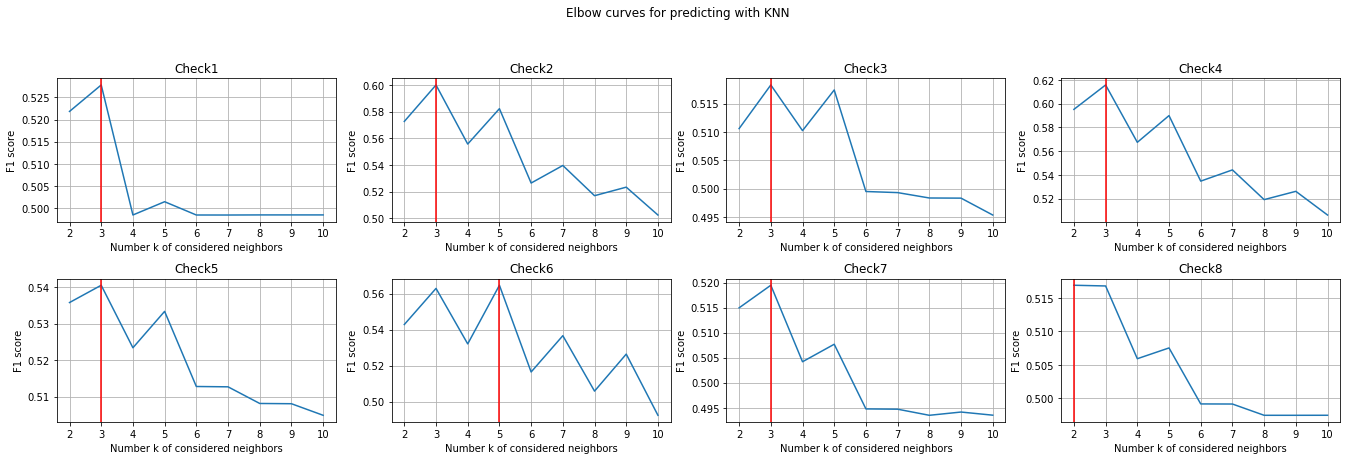

F1_macro_Check_1  F1_macro_Check_2  F1_macro_Check_3  F1_macro_Check_4  \
0  0         52.781336         60.006029         51.830622         61.564993   

   F1_macro_Check_5  F1_macro_Check_6  F1_macro_Check_7  F1_macro_Check_8  
0         54.051802         56.462028         51.946512         51.692411

Acc_Check_1  Acc_Check_2  Acc_Check_3  Acc_Check_4  Acc_Check_5  \
0  0    99.664548    98.101945    98.149433    94.807740    99.315322   
1  0     5.898123    21.910112     5.511811    28.322247     8.788282   

   Acc_Check_6  Acc_Check_7  Acc_Check_8  
0    80.969214    98.240850    99.482383  
1    31.954841     5.652174     3.902439

Time_Check_1  Time_Check_2  Time_Check_3  Time_Check_4  Time_Check_5  \
0  0      3.104165      3.049168      3.146145      3.340077      2.927235   

   Time_Check_6  Time_Check_7  Time_Check_8  
0      3.482564      3.196323      3.615713

In [40]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.gridspec as gridspec
from IPython.display import clear_output
import time

figsize = (23, 10)
cols = 4
gs = gridspec.GridSpec(9 // cols + 1, cols)
gs.update(hspace=0.4)

fig1 = plt.figure(num=1, figsize=figsize)
ax = []
global_f1_by_classes = []
global_f1_macro = []
Time = []
for i in range(8):
    clear_output()
    print("working on Check ", i+1, "/8")
    row = (i // cols)
    col = i % cols
    ax.append(fig1.add_subplot(gs[row, col]))
    
    f1_macro = []
    f1_by_classes = []
    time_of_computation = []
    
    #Elbow method
    for k in range(2,11) :
        clear_output()
        print("working on Check ", i+1, "/8, Elbow method testing k=", k,"/10")
        t1 = time.time()
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(XYtrain_pairs[i][0], XYtrain_pairs[i][1])
        y_pred_knn = neigh.predict(XYtest_pairs[i][0])
        time_of_computation.append(time.time() - t1)
        score = f1_score(XYtest_pairs[i][1].values, y_pred_knn, average='macro')
        f1_macro.append(score)
        score_by_classes = f1_score(XYtest_pairs[i][1].values, y_pred_knn, average=None)
        f1_by_classes.append(score_by_classes)
    
    #plotting part
    ax[-1].plot(range(2,11), f1_macro)
    ax[-1].set_xlabel('Number k of considered neighbors')
    ax[-1].set_xticklabels(range(1,11))
    ax[-1].set_ylabel('F1 score')
    ax[-1].set_title(names_of_checks[i])
    ax[-1].axvline(f1_macro.index(max(f1_macro)) + 2, color='r')
    ax[-1].grid()
    
    #filling score and Time lists part
    global_f1_macro.append(max(f1_macro))
    global_f1_by_classes.append(f1_by_classes[f1_macro.index(max(f1_macro))])
    Time.append(time_of_computation[f1_macro.index(max(f1_macro))])

fig1.suptitle("Elbow curves for predicting with KNN")
plt.show()

f1mac = {'' : [0], 
     'F1_macro_Check_1' : global_f1_macro[0]*100,
     'F1_macro_Check_2' : global_f1_macro[1]*100,
     'F1_macro_Check_3' : global_f1_macro[2]*100,
     'F1_macro_Check_4' : global_f1_macro[3]*100,
     'F1_macro_Check_5' : global_f1_macro[4]*100,
     'F1_macro_Check_6' : global_f1_macro[5]*100,
     'F1_macro_Check_7' : global_f1_macro[6]*100,
     'F1_macro_Check_8' : global_f1_macro[7]*100
          } 
sdf = pd.DataFrame(f1mac) 

f1cl = { '' : [0,0], 
     'Acc_Check_1' : global_f1_by_classes[0]*100,
     'Acc_Check_2' : global_f1_by_classes[1]*100,
     'Acc_Check_3' : global_f1_by_classes[2]*100,
     'Acc_Check_4' : global_f1_by_classes[3]*100,
     'Acc_Check_5' : global_f1_by_classes[4]*100,
     'Acc_Check_6' : global_f1_by_classes[5]*100,
     'Acc_Check_7' : global_f1_by_classes[6]*100,
     'Acc_Check_8' : global_f1_by_classes[7]*100
          } 
savdf = pd.DataFrame(f1cl) 

time = {'' : [0], 
     'Time_Check_1' : Time[0],
     'Time_Check_2' : Time[1],
     'Time_Check_3' : Time[2],
     'Time_Check_4' : Time[3],
     'Time_Check_5' : Time[4],
     'Time_Check_6' : Time[5],
     'Time_Check_7' : Time[6],
     'Time_Check_8' : Time[7]
          } 
 
timedf = pd.DataFrame(time)
display(sdf)
display(savdf)
display(timedf)

The 8 models are quite fast to execute, 3 seconds is a priori a good computation time (we'll see later comparation with other models). Indeed, it has a O(n2) Complexity.[4]

Theoretically, an advantage of KNN is that they "can detect global and local anomalies" [4]. Here, among our 8 models, all our F1-scores with macro average are between 50 and 62%. These values are not impressive, but not really bad either. However, if we look at un-averaged F1-scores, the reality is quite disappointing : we are reealy good at saying a row is "normal" (high F1-score for class `0`), but **we have big difficulties correctly affirming a row is an anomaly** : our best F1-score for class `1` barely reachs 30%, and the worst is from 4%, which is almost nothing.

Moreover, KNN are not easy to interprete, as Christoph Molnar states in his book [5] :
>The k-nearest neighbor model differs from the other interpretable models presented in this book because it is an instance-based learning algorithm. How can k-nearest neighbors be interpreted? First of all, there are no parameters to learn, so there is no interpretability on a modular level. Furthermore, there is a lack of global model interpretability because the model is inherently local and there are no global weights or structures explicitly learned. Maybe it is interpretable at the local level? To explain a prediction, you can always retrieve the k neighbors that were used for the prediction. Whether the model is interpretable depends solely on the question whether you can ‘interpret’ a single instance in the dataset. **If an instance consists of hundreds or thousands of features, then it is not interpretable, I would argue. But if you have few features or a way to reduce your instance to the most important features, presenting the k-nearest neighbors can give you good explanations.**

To conclude, the only benefit of KNN in our case is their computation time : **they perform poorly on our datasets and are not interpretable**. We can froget them.

----
----

## **Working with Classification And Regression Trees (CART)**

Using CART has been already been seen in Anomaly Detection, for example when the NASA decided to use data-driven methods to automatically detect and isolate faults in the J-2X rocket engine [6] : 
>We decided to use a decision tree learning algorithm because the decision trees learned by these algorithms are much easier for human experts to interpret than the models produced by some competing algorithms such as neural networks or support vector machines. Having engineering experts examine the decision trees is very helpful for verifying them before deploying them. The decision tree algorithm automatically “learns” a decision tree by performing a search through the space of possible decision trees to find one that fits the training data.

Here we will use `sklearn.tree.DecisionTreeClassifier()` and `sklearn.tree.RandomForestClassifier()`, from the scikit-learn library [3] . We will begin with **multi-label prediction** and continue with **one-o-one prediction**. Our first criteria of evaluation is the F1-score metric, with `sklearn.metrics.f1_score()` method and macro average.

### **Multi-label prediction**

In [21]:
from sklearn import tree
import time 

t0 = time.time()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xnorm_train9, y_train9)
y_dt = clf.predict(Xnorm_test9)
print("Time of computation :", time.time() - t0, " s")

29.371690273284912


In [60]:
from sklearn.metrics import f1_score

f1mac = {'' : [0], 
     'F1_macro_Check_1' : f1_score(y_dt[...,0], y_test9['Check1'].values, average='macro'),  
     'F1_macro_Check_2' : f1_score(y_dt[...,1], y_test9['Check2'].values, average='macro'),
     'F1_macro_Check_3' : f1_score(y_dt[...,2], y_test9['Check3'].values, average='macro'),
     'F1_macro_Check_4' : f1_score(y_dt[...,3], y_test9['Check4'].values, average='macro'),
     'F1_macro_Check_5' : f1_score(y_dt[...,4], y_test9['Check5'].values, average='macro'),
     'F1_macro_Check_6' : f1_score(y_dt[...,5], y_test9['Check6'].values, average='macro'),
     'F1_macro_Check_7' : f1_score(y_dt[...,6], y_test9['Check7'].values, average='macro'),
     'F1_macro_Check_8' : f1_score(y_dt[...,7], y_test9['Check8'].values, average='macro')
          } 
sdf = pd.DataFrame(f1mac) 

f1cl = { '' : np.sort(y_test9['Check1'].unique()), 
     'Acc_Check_1' : f1_score(y_dt[...,0], y_test9['Check1'].values, average=None),  
     'Acc_Check_2' : f1_score(y_dt[...,1], y_test9['Check2'].values, average=None),
     'Acc_Check_3' : f1_score(y_dt[...,2], y_test9['Check3'].values, average=None),
     'Acc_Check_4' : f1_score(y_dt[...,3], y_test9['Check4'].values, average=None),
     'Acc_Check_5' : f1_score(y_dt[...,4], y_test9['Check5'].values, average=None),
     'Acc_Check_6' : f1_score(y_dt[...,5], y_test9['Check6'].values, average=None),
     'Acc_Check_7' : f1_score(y_dt[...,6], y_test9['Check7'].values, average=None),
     'Acc_Check_8' : f1_score(y_dt[...,7], y_test9['Check8'].values, average=None)
          } 
savdf = pd.DataFrame(f1cl) 

display(sdf)
display(savdf)

F1_macro_Check_1  F1_macro_Check_2  F1_macro_Check_3  F1_macro_Check_4  \
0  0          0.970436          0.979856          0.979853          0.980198   

   F1_macro_Check_5  F1_macro_Check_6  F1_macro_Check_7  F1_macro_Check_8  
0          0.967089          0.992231          0.884351          0.654716

Acc_Check_1  Acc_Check_2  Acc_Check_3  Acc_Check_4  Acc_Check_5  \
0 -1.0     0.974223     0.971164     0.979723     0.961746     0.962276   
1  0.0     0.997212     0.996448     0.997241     0.994415     0.994684   
2  1.0     0.939873     0.971957     0.962594     0.984433     0.944306   

   Acc_Check_6  Acc_Check_7  Acc_Check_8  
0     0.989772     0.977417     0.074074  
1     0.996322     0.987838     0.998751  
2     0.990598     0.687797     0.891324

So, feeding the classifier with all the *Check* to predict gives quite a good F1-score on some columns, except for *Check8*. If we look in detail the accuracy over the possible labels (`0` : everything is ok, `1` : it's an anomaly, `-1` : I can't predict), our model returns also satisfying results. Let's see if we can obtain better results with a `RandomForestClassifier`.

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import time 

t0 = time.time()

clf = RandomForestClassifier()
clf = clf.fit(Xnorm_train9, y_train9)
y_rf = clf.predict(Xnorm_test9)
print("Time of computation :", time.time() - t0, " s")

f1macRF = {'' : [0], 
     'F1_macro_Check_1' : f1_score(y_rf[...,0], y_test9['Check1'].values, average='macro'),  
     'F1_macro_Check_2' : f1_score(y_rf[...,1], y_test9['Check2'].values, average='macro'),
     'F1_macro_Check_3' : f1_score(y_rf[...,2], y_test9['Check3'].values, average='macro'),
     'F1_macro_Check_4' : f1_score(y_rf[...,3], y_test9['Check4'].values, average='macro'),
     'F1_macro_Check_5' : f1_score(y_rf[...,4], y_test9['Check5'].values, average='macro'),
     'F1_macro_Check_6' : f1_score(y_rf[...,5], y_test9['Check6'].values, average='macro'),
     'F1_macro_Check_7' : f1_score(y_rf[...,6], y_test9['Check7'].values, average='macro'),
     'F1_macro_Check_8' : f1_score(y_rf[...,7], y_test9['Check8'].values, average='macro')
          } 
sdfRF = pd.DataFrame(f1macRF) 

f1clRF = { '' : np.sort(y_test9['Check1'].unique()), 
     'Acc_Check_1' : f1_score(y_rf[...,0], y_test9['Check1'].values, average=None),  
     'Acc_Check_2' : f1_score(y_rf[...,1], y_test9['Check2'].values, average=None),
     'Acc_Check_3' : f1_score(y_rf[...,2], y_test9['Check3'].values, average=None),
     'Acc_Check_4' : f1_score(y_rf[...,3], y_test9['Check4'].values, average=None),
     'Acc_Check_5' : f1_score(y_rf[...,4], y_test9['Check5'].values, average=None),
     'Acc_Check_6' : f1_score(y_rf[...,5], y_test9['Check6'].values, average=None),
     'Acc_Check_7' : f1_score(y_rf[...,6], y_test9['Check7'].values, average=None),
     'Acc_Check_8' : f1_score(y_rf[...,7], y_test9['Check8'].values, average=None)
          } 
savdfRF = pd.DataFrame(f1clRF) 

display(sdfRF)
display(savdfRF)

Time of computation : 36.14130401611328  s


F1_macro_Check_1  F1_macro_Check_2  F1_macro_Check_3  F1_macro_Check_4  \
0  0          0.955169          0.988532          0.985271          0.987349   

   F1_macro_Check_5  F1_macro_Check_6  F1_macro_Check_7  F1_macro_Check_8  
0          0.978413          0.994808          0.882988          0.617525

Acc_Check_1  Acc_Check_2  Acc_Check_3  Acc_Check_4  Acc_Check_5  \
0 -1.0     0.979154     0.981936     0.986938     0.977085     0.977042   
1  0.0     0.997465     0.997917     0.998062     0.996498     0.996431   
2  1.0     0.888889     0.985743     0.970812     0.988464     0.961767   

   Acc_Check_6  Acc_Check_7  Acc_Check_8  
0     0.994040     0.985900     0.000000  
1     0.997287     0.990195     0.998576  
2     0.993098     0.672868     0.854000

It's slightly better with a RandomForestClassifier than with a simple DecisionTreeClassifier on *Check2*, *Check3*, *Check4*, *Check5* & *Check6*, but not significantly. Moreover, as it's a random process, these little improvements can disappear - in fact, as we ran the previous cell for the first time, it was only better on *Check1*.

It might be intersting to train different trees, one for each label. Let's put multi-label classification aside for the following.


---
### **One-o-one predictions**

#### **Decision trees**

* **First implementation with df4**

In order to visualize the interpretability of the model, we apply the algorithm to predict the first check.

In [55]:
from sklearn import tree
from sklearn.metrics import f1_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xnorm_train4, y_train4)
y_dt = clf.predict(Xnorm_test4)

In [56]:
score_av = f1_score(y_test4.values, y_dt, average='macro')
score = f1_score(y_test4.values, y_dt, average=None)

print('f1 score : ',100*score_av, '%')

cat_sort = np.sort(y_test4.unique())
train = {'Category' : cat_sort, 
     'Accuracy percent' : score*100,
          } 
savdf = pd.DataFrame(train) 
savdf

f1 score :  99.7200771814015 %


Accuracy percent  Category
0         99.944593       0.0
1         99.495561       1.0

The f1-score provided by category shows really high accuracy regarding the anomaly detection. Let's understand how such results are obtained.

In the next steps, we aim at drawing the tree built by the method.

'--------------------------'

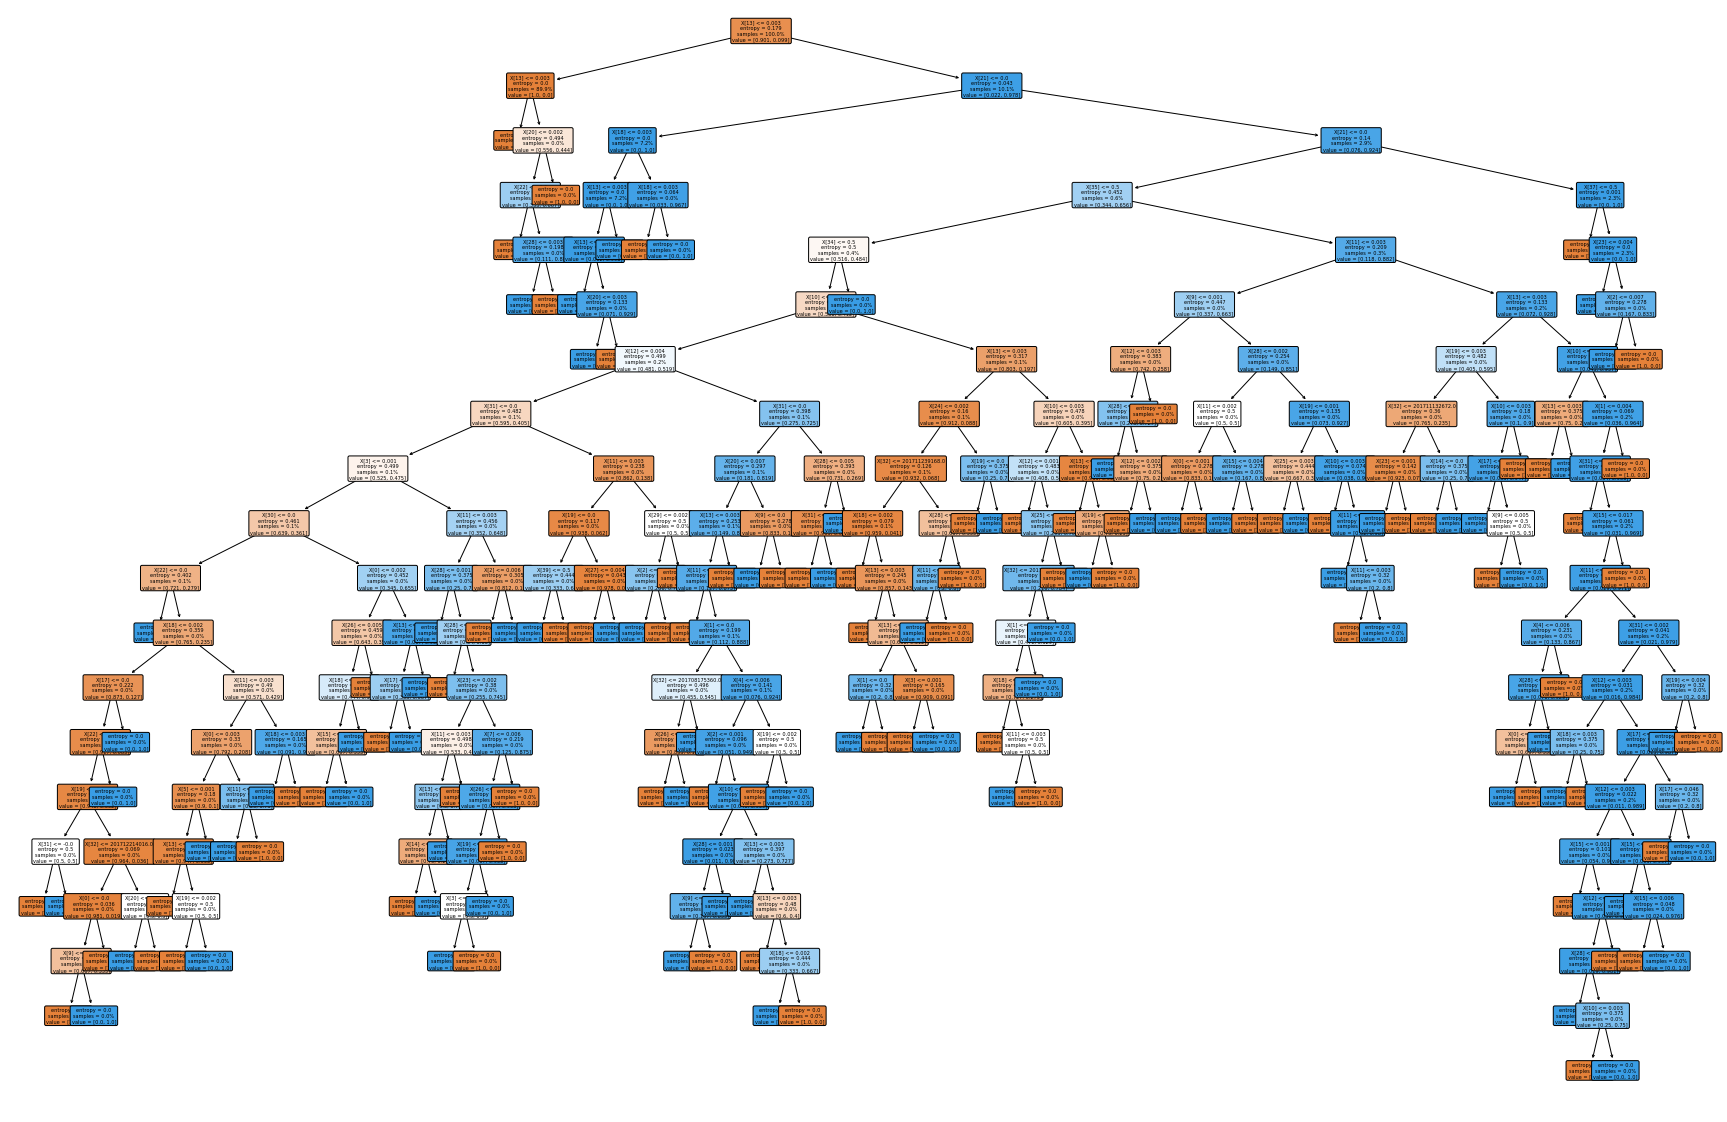

In [70]:
from sklearn import tree
import graphviz 
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(30,20))
tree.plot_tree(clf,filled=True, proportion=True , rounded=True, fontsize= 5) 

'--------------------------'

Tree based models split the data multiple times according to certain cutoff values in the features. Through splitting, different subsets of the dataset are created, with each instance belonging to one subset. The final subsets are called terminal or leaf nodes and the intermediate subsets are called internal nodes or split nodes. To predict the outcome in each leaf node, the average outcome of the training data in this node is used.

Let's have a closer look to the first optimal questions selected by the Decision Tree :

'--------------------------'

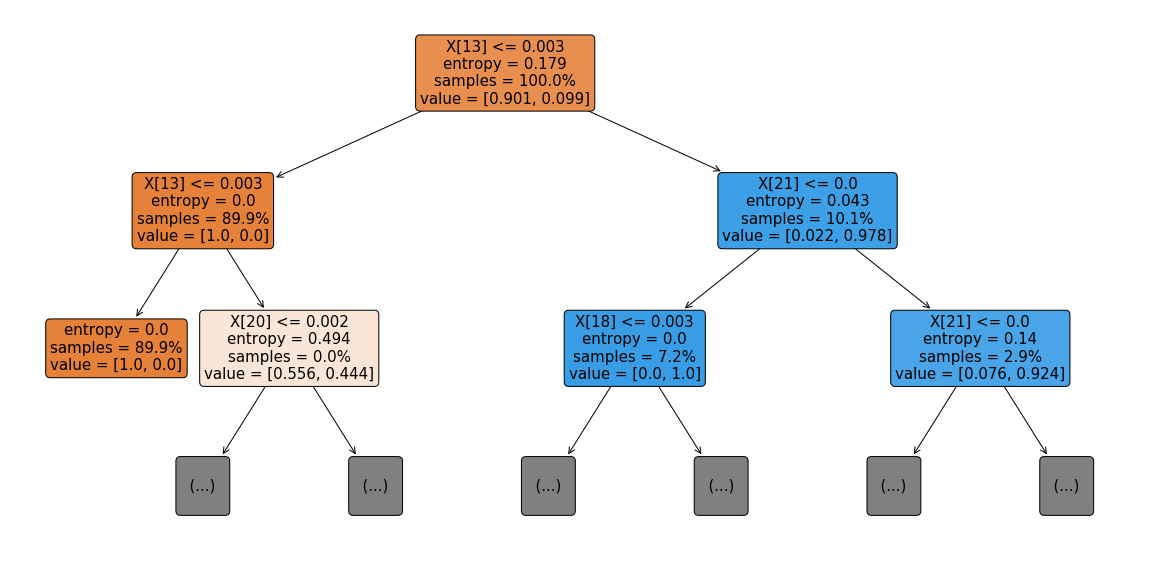

In [59]:
figure = plt.figure(figsize=(20,10))
tree.plot_tree(clf,filled=True,max_depth = 2, proportion=True , rounded=True, fontsize= 15) 

'--------------------------'

We can see that some imformation is given on how the data split was performed at each step. The values of the colums mentionned refers to the normalized values of de following features :

In [62]:
columns1 = Xnorm_test4.columns.values
num = [13,18,20,21]
for i in num :
    print('The ',i, '-th column of the test set is ',columns1[i])

The  13 -th column of the test set is  IndexServerAllocationLimit
The  18 -th column of the test set is  Disk
The  20 -th column of the test set is  LargestPartitionSize
The  21 -th column of the test set is  DiagnosisFiles


The 'samples' gives the proportion of dataset for which the condition on the given column is respected or not. But what it's really important to highlight is the value of the entropy that provides a measure of the relative importance of one features regarding the others. In that case, the feature 13, *IndexServerAllocationLimit* gives more information about the label than the four other features.

Globally, in the whole tree, the seven most informative features for the prediction of *Check4* are :

In [68]:
feat_imp = clf.feature_importances_
feat_imp_index = feat_imp.argsort()[-7:][::-1]
count = 1
for i in feat_imp_index[::-1] :
    print('The ',count, 'most important feature is',columns1[i])
    count+=1

The  1 most important feature is TablesAllocation
The  2 most important feature is InstanceMEM
The  3 most important feature is PhysMEM
The  4 most important feature is Check2
The  5 most important feature is Check3
The  6 most important feature is DiagnosisFiles
The  7 most important feature is IndexServerAllocationLimit


It can be noted that those features have shown to be the most correlated to *Check4* during the data visualization phase. Let's remind :

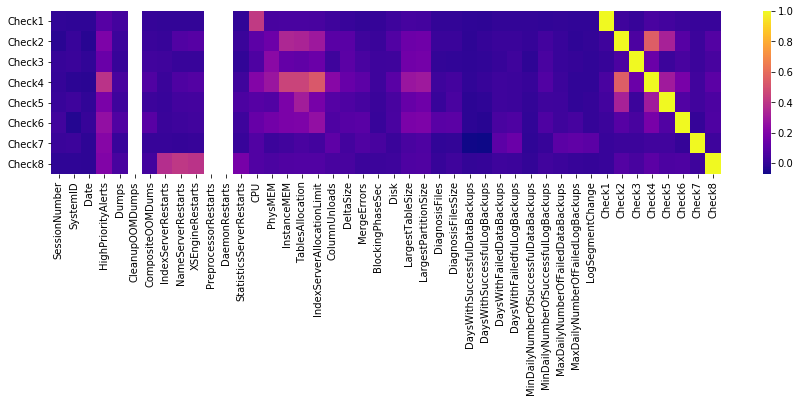

However, the correlation of a feature isn't directly related to its importance. Indeed, if it were the case, *IndexServerAllocationLimit* should be the most important feature and that's not the case.

* **Implementation**

We now make the predictions for all the checks using Decision Tree.

In [106]:
from sklearn.metrics import f1_score
import time 

score = []
score_av = []
Time = []
y_pred = 

t0 = time.time()

for k in range(len(XYtrain_pairs)) :
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(XYtrain_pairs[k][0], XYtrain_pairs[k][1])
    y_dt = clf.predict(XYtest_pairs[k][0])
    Time.append(time.time() - t0)
    score_av.append(f1_score(XYtest_pairs[k][1].values, y_dt, average='macro'))
    score.append(f1_score(XYtest_pairs[k][1].values, y_dt, average=None))
    t0 = time.time()

In [117]:
cat_sort = np.sort(y_test1.unique())

train = {'1Category' : cat_sort, 
     'Acc_Check_1' : score[0]*100,
     'Acc_Check_2' : score[1]*100,
     'Acc_Check_3' : score[2]*100,
     'Acc_Check_4' : score[3]*100,
     'Acc_Check_5' : score[4]*100,
     'Acc_Check_6' : score[5]*100,
     'Acc_Check_7' : score[6]*100,
     'Acc_Check_8' : score[7]*100
          } 
savdf = pd.DataFrame(train) 

time = {'' : [0], 
     'Time_Check_1' : Time[0],
     'Time_Check_2' : Time[1],
     'Time_Check_3' : Time[2],
     'Time_Check_4' : Time[3],
     'Time_Check_5' : Time[4],
     'Time_Check_6' : Time[5],
     'Time_Check_7' : Time[6],
     'Time_Check_8' : Time[7]
          } 
 
timedf = pd.DataFrame(time)
display(savdf)
display(timedf)

1Category  Acc_Check_1  Acc_Check_2  Acc_Check_3  Acc_Check_4  Acc_Check_5  \
0        0.0    99.994250    99.965522    99.941492    99.947917    99.975898   
1        1.0    99.082569    99.001427    98.144712    99.525875    98.036007   

   Acc_Check_6  Acc_Check_7  Acc_Check_8  
0    99.653527    99.030741        100.0  
1    99.142804    69.840256        100.0

Time_Check_1  Time_Check_2  Time_Check_3  Time_Check_4  Time_Check_5  \
0  0      1.210705      1.390466      1.344205      1.201389      4.105408   

   Time_Check_6  Time_Check_7  Time_Check_8  
0      2.006755     10.368102      2.277159

The results obtained through Decision Tree predictions are highly accurate, with a perfect prediction for Check8, except for Check7 for which it detects only 70% of the anomalies.

What can also be interesting to look at in detail is the values of the precision and recall variables (f1-score is, in fact, an harmonic mean of those two variables). 

In [59]:
precision = [confusion[k][1][1]/(confusion[k][1][1]+confusion[k][0][1]) for k in range(len(confusion)) ]
recall = [confusion[k][1][1]/(confusion[k][1][1]+confusion[k][1][0]) for k in range(len(confusion)) ]
precision_recall = [ (100*precision[k], 100*recall[k]) for k in range(len(confusion))]

In [58]:

conf = {'' : ['precision', 'recall'],
     'Check_1' : precision_recall[0],
     'Check_2' : precision_recall[1],
     'Check_3' : precision_recall[2],
     'Check_4' : precision_recall[3],
     'Check_5' : precision_recall[4],
     'Check_6' : precision_recall[5],
     'Check_7' : precision_recall[6],
     'Check_8' : precision_recall[7]
          } 
confdf = pd.DataFrame(conf)
display(confdf)

Check_1    Check_2    Check_3    Check_4    Check_5  \
0  precision  99.079755  99.142857  98.271605  99.635922  98.363339   
1     recall  98.776758  98.973189  98.332304  99.254483  97.564935   

     Check_6    Check_7  Check_8  
0  99.266488  69.435637    100.0  
1  99.100161  71.196359    100.0

The precision gives informations on how well the algorithm identify **only the anomalies**.

The recall tells us how well the algorithm identifies **all the anomalies**.

It can be really interesting, depending on the application, to look closely at those values. A high precision ensures that not 'false alarms' will be given while a high recall ensures that all anomalies will be identified.

* **Conclusion on one-o-one predictions using Decision trees**

The results obtained through Decision Tree prediction are highly accurate, with a perfect prediction for Check8. Decision trees seem to be a good method but let's not forget that Decision-tree learners can create over-complex trees that do not generalize the data well... This is called overfitting. Over fitting is one of the most practical difficulty for decision tree models.

That's why we'll look in the next part at Random Forest classifiers. Indeed, it creates a 'forest', an ensemble of Decision Trees, and makes it somehow random. It is most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

#### **RandomForest**


Random Forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.
Therefore, in Random Forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. In he following part, we'll try to find the optimal for the size of the features considered, and also the depth of the considered trees for each dataset.

* **Parameters optimization**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rng = np.random.RandomState(1) 
best_param = []
for k in range(len(XYtrain_pairs)) :
    rf = GridSearchCV(RandomForestClassifier(
                            random_state=rng,
                            n_estimators=50,
                            class_weight='balanced'),
                      param_grid={'max_depth': range(3, 8, 1),
                                  'max_features': np.linspace(0.1, 1., 5)},
                      scoring={'AUC': 'roc_auc'}, cv=5,
                      refit='AUC', n_jobs=-1)

    rf.fit(XYtrain_pairs[k][0], XYtrain_pairs[k][1])
    scoring_rf = rf.predict_proba(XYtest_pairs[k][0])[:, 1]
    best_param.append(rf.best_params_)
    print("Random Forest selected parameters : %s" % rf.best_params_)


Random Forest selected parameters : {'max_features': 0.55, 'max_depth': 6}
Random Forest selected parameters : {'max_features': 0.55, 'max_depth': 7}
Random Forest selected parameters : {'max_features': 0.775, 'max_depth': 7}
Random Forest selected parameters : {'max_features': 0.775, 'max_depth': 7}
Random Forest selected parameters : {'max_features': 0.325, 'max_depth': 7}
Random Forest selected parameters : {'max_features': 0.775, 'max_depth': 7}
Random Forest selected parameters : {'max_features': 0.775, 'max_depth': 7}
Random Forest selected parameters : {'max_features': 0.55, 'max_depth': 4}


|   Checks   |   max_features |   max_depth |    
|----------------------|--------------------|----------------------------------|
| Check1    |      0.55          |    6  |   
| Check2     |       0.55        |       7    |
| Check3     |        0.775       |     7      |
| Check4     |         0.775      |        7   |
| Check5     |        0.325       |        7   |
| Check6     |      0.775         |       7   |
| Check7     |          0.775     |    7       |
| Check8     |          0.55     |         4  |

*  **Predictions**

Let's now make some predictions using those parameters.

In [120]:
from sklearn.ensemble import RandomForestClassifier
import time

scoreRF = []
scoreRF_av = []
TimeRF = []

t0 = time.time()

for k in range(len(XYtrain_pairs)) :
    clf = RandomForestClassifier(max_features=best_param[k]['max_features'], max_depth = best_param[k]['max_depth'])
    clf = clf.fit(XYtrain_pairs[k][0], XYtrain_pairs[k][1])
    y_rf = clf.predict(XYtest_pairs[k][0])
    TimeRF.append(time.time() - t0)
    scoreRF_av.append(f1_score(XYtest_pairs[k][1].values, y_rf, average='macro'))
    scoreRF.append(f1_score(XYtest_pairs[k][1].values, y_rf, average=None))
    t0 = time.time()

In [121]:
cat_sort = np.sort(y_test1.unique())

trainRF = {'1Category' : cat_sort, 
     'Acc_Check_1' : scoreRF[0]*100,
     'Acc_Check_2' : scoreRF[1]*100,
     'Acc_Check_3' : scoreRF[2]*100,
     'Acc_Check_4' : scoreRF[3]*100,
     'Acc_Check_5' : scoreRF[4]*100,
     'Acc_Check_6' : scoreRF[5]*100,
     'Acc_Check_7' : scoreRF[6]*100,
     'Acc_Check_8' : scoreRF[7]*100
          } 
savRFdf = pd.DataFrame(trainRF) 

timeRF = {'' : [0], 
     'Time_Check_1' : TimeRF[0],
     'Time_Check_2' : TimeRF[1],
     'Time_Check_3' : TimeRF[2],
     'Time_Check_4' : TimeRF[3],
     'Time_Check_5' : TimeRF[4],
     'Time_Check_6' : TimeRF[5],
     'Time_Check_7' : TimeRF[6],
     'Time_Check_8' : TimeRF[7]
          } 
 
timeRFdf = pd.DataFrame(timeRF)
display(savRFdf)
display(timeRFdf)

1Category  Acc_Check_1  Acc_Check_2  Acc_Check_3  Acc_Check_4  Acc_Check_5  \
0        0.0    99.997125    99.977343    99.948314    99.930158    99.973892   
1        1.0    99.540582    99.343795    98.364702    99.366898    97.854785   

   Acc_Check_6  Acc_Check_7  Acc_Check_8  
0    99.731136    99.232883    99.976243  
1    99.336722    71.390476    97.633655

Time_Check_1  Time_Check_2  Time_Check_3  Time_Check_4  Time_Check_5  \
0  0      4.313098      2.898883      4.678751      4.462255      4.658783   

   Time_Check_6  Time_Check_7  Time_Check_8  
0      6.535314     10.916113      7.527243

* **The precision and recall values**

As previously done for the Decision trees, let's look at the precision recall values of the Random Forest for the first dataset.

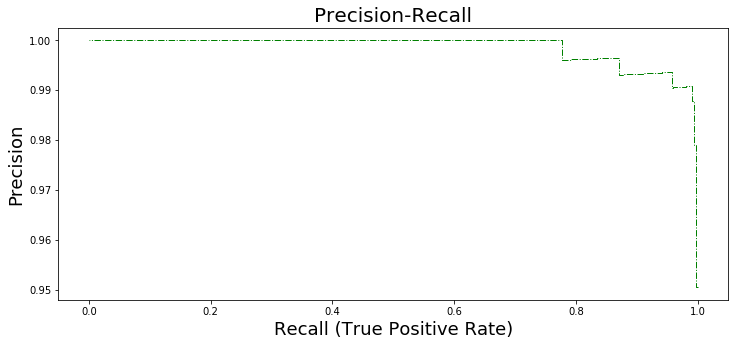

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

rf = RandomForestClassifier(max_features = 0.55, max_depth = 6)
rf.fit(Xnorm_train1, y_train1)
scoring_rf = rf.predict_proba(Xnorm_test1)[:, 1]

# Plot ROC and PR curves

fig, axes = plt.subplots(1, 1, figsize=(12, 5),
                         sharex=True, sharey=True)

ax = axes

precision_RF, recall_RF, _ = precision_recall_curve(y_test1, scoring_rf)
ax.step(recall_RF, precision_RF, linestyle='-.', c='g', lw=1, where='post')
ax.set_title("Precision-Recall", fontsize=20)
ax.set_xlabel('Recall (True Positive Rate)', fontsize=18)
ax.set_ylabel('Precision', fontsize=18)
plt.show()

The precision-recall curve illustrates the performance of Random Forests after each step (every peak value corresponding to the successive adding of one estimator in the forest) in this classification task.

Fo all the other datasets :

In [76]:
precision = [confusion[k][1][1]/(confusion[k][1][1]+confusion[k][0][1]) for k in range(len(confusion)) ]
recall = [confusion[k][1][1]/(confusion[k][1][1]+confusion[k][1][0]) for k in range(len(confusion)) ]
precision_recall = [ (100*precision[k], 100*recall[k]) for k in range(len(confusion))]

In [77]:

conf = {'' : ['precision', 'recall'],
     'Check_1' : precision_recall[0],
     'Check_2' : precision_recall[1],
     'Check_3' : precision_recall[2],
     'Check_4' : precision_recall[3],
     'Check_5' : precision_recall[4],
     'Check_6' : precision_recall[5],
     'Check_7' : precision_recall[6],
     'Check_8' : precision_recall[7]
          } 
confdf = pd.DataFrame(conf)
display(confdf)

Check_1    Check_2    Check_3    Check_4    Check_5  \
0  precision  97.897898  98.871332  96.067756  99.474854  98.487395   
1     recall  99.694190  99.942955  98.085238  99.234334  95.129870   

     Check_6    Check_7     Check_8  
0  97.144273  77.525968  100.000000  
1  97.319101  53.381014   94.863014

* **Conclusion on Random Forest**

As expected, the results are as good as those obtain with Decision trees and sometimes better !

However, the processing time is 2 to 4 time higher for Random forest... Also, as it uses a high number of trees on a random subset of features, it is less interpretable than Decision trees, they are like black boxes which make the understanding of the model output quite tricky.

----
----
## **Repeated Incremental Pruning to Produce Error Reduction (RIPPER)**

We decided to go for an unofficial python implementations on GitHub of the RIPPER model : https://github.com/azampagl/ai-ml-ripperk/

As the author precises it, his work has been based on the paper *Fast Effective Rule Induction*, written by William W. Cohen. [7]

RIPPER is a variant of the sequential covering algorithm :  [5]
>The idea is simple: First, find a good rule that applies to some of the data points. Remove all data points which are covered by the rule. A data point is covered when the conditions apply, regardless of whether the points are classified correctly or not. Repeat the rule-learning and removal of covered points with the remaining points until no more points are left or another stop condition is met. The result is a decision list. This approach of repeated rule-learning and removal of covered data points is called “separate-and-conquer”.

This implementation requires training and testing datasets to be txt files, with spaces as separators between values of a same row, and returns to the lines between rows. We firstly built these `train1.txt` & `test1.txt` files for the prediction of *Check1*.

In [22]:
from IPython.display import clear_output

df1 = df9[df9['Check1'] != -1]
X1 = df1.drop(['Check1'],axis=1)
y1 = df1['Check1']
train1, test1 = train_test_split(df1, test_size=0.2, random_state=42, stratify=y1)

file = open("./data2/train1.txt","w") 

j = 0
last_index_of_the_df = train1.index[-1]
for index in train1.index:                                          #for row in df
    print(100*j/len(train1.index), '% done')
    len_of_the_row = len(train1.loc[[index]].values[0])
    for i in range(len_of_the_row) :                                    #for value in row
        x = train1.loc[[index]].values[0][i]
        file.write(str(x))                                                    #write value
        if (i != len_of_the_row - 1):                                         #if it's not the last value of the row
            file.write(' ')                                                         #add ' '
    if (index != last_index_of_the_df):                                  #if it's not the last row of the df
        file.write('\n')                                                     #return to the line
    clear_output()
    j+=1

file.close() 

In [23]:
file = open("./data2/test1.txt","w") 

j = 0
last_index_of_the_df = test1.index[-1]
for index in test1.index:
    print(100*j/len(test1.index), '% done')
    len_of_the_row = len(test1.loc[[index]].values[0])
    for i in range(len_of_the_row) :
        x = test1.loc[[index]].values[0][i]
        file.write(str(x))
        if (i != len_of_the_row - 1):  
            file.write(' ')
    if (index != last_index_of_the_df):
        file.write('\n')
    clear_output()
    j+=1
    
file.close() 

We also manually built the .txt file describing all the attributes : `attr.txt`.

Then we tried to run the first phase of RIPPER, which is called 'learning'. This part of the script reads in training cases and builds a rule model. It's supposed to be followed by a 'classifying' phase, which reads in test cases and trys to accurately predict them based on the rule model learned in the learning phase.

In [ ]:
import time
print(time.strftime('%d/%m/%Y %H:%M'))
t0 = time.time()
! python ripperk.py -e learn -a "./data2/attr.txt" -c Check1 -t "./data2/train1.txt" -m "./results/1st-model.dat" -o "./results/1st-model.txt" -k 2 -p 1
print("Computation time for 'learning' :", time.time() - t0, "s")

31/05/2019 10:08


Despite this cell has been running since 5 hours, it hasn't reach its end. By lack of time, we decided to give up this model, to focus on others. 

---
---
## **Bayesian Rule Set (BRS)**

Bayesian Rule Set "follows this rough recipe:
* Pre-mine frequent patterns from the data that can be used as conditions for the decision rules.
* Learn a decision list from a selection of the pre-mined rules." [5]

We decided to go for the `ruleset` python library : https://pypi.org/project/ruleset/, based on the paper *A Bayesian Framework for Learning Rule Sets for Interpretable Classification* [8]


In [ ]:
!pip install --user ruleset

During our first approaches to BRS prediction of *Check1*, we quickly saw that the size of the input datasets has a huge impact on how well the model responds. We decided to took in consideration only 20% of this dataset.

In [ ]:
mini_df1 = df1.sample(frac=0.20)

mini_X1 = mini_df1.drop(['Check1'],axis=1)
mini_y1 = mini_df1['Check1']

# BRS makes a bitwise comparison between what it predict and what's expected, so it needs booleans
mini_y1 = mini_y1.astype('bool')

mini_X_train1, mini_X_test1, mini_y_train1, mini_y_test1 = train_test_split(mini_X1, mini_y1, test_size=0.2,
                                                                            random_state=42, stratify=mini_y1)

# BRS needs numpy.ndarray for prediction
ytrain = mini_y_train1.as_matrix()
ytest =  mini_y_test1.as_matrix()

Here we go for the implementation of BRS:

In [6]:
import ruleset as rs
import time
from sklearn.metrics import f1_score

print(time.strftime('%d/%m/%Y %H:%M'))
model = rs.BayesianRuleSet(method='forest', maxlen=2, max_iter=200, level=4, support=1, chains=2)
model.fit(mini_X_train1, ytrain)
yhat = model.predict(mini_X_test1)

print(time.strftime('%d/%m/%Y %H:%M'))

score = f1_score(ytest, yhat, average='macro')
print("score = f1_score(ytest, yhat, average='macro') : ", score)

score_by_classes = f1_score(ytest, yhat, average=None)
print("score_by_classes = f1_score(ytest, yhat, average=None) : ", score_by_classes)

28/05/2019 14:29

** chain = 2, max at iter = 0 ** 
 accuracy = 0.9502404647397743, TP = 68,FP = 1884, TN = 39844, FN = 206
 old is -999999999.9, pt_new is -1886.4954256904034, prior_ChsRules=-14.03515447769314, likelihood_1 = -578.4449717854648, likelihood_2 = -1294.0152994272455
 
['0.004327346190119092<=HighPriorityAlerts']
[26]

** chain = 2, max at iter = 9 ** 
 accuracy = 0.9934765011189943, TP = 0,FP = 0, TN = 41728, FN = 274
 old is -1886.3954256904035, pt_new is -1668.969168912309, prior_ChsRules=-14.03515447769314, likelihood_1 = 0.0, likelihood_2 = -1654.9340144346158
 
[]

28/05/2019 14:40
score = f1_score(ytest, yhat, average='macro') : 0.49837584790293304
score_by_classes = f1_score(ytest, yhat, average=None) :  [0.9967517 0.       ]



After running during 11 minutes, the BRS model outputs only one rule :
> ***IF* 0.004327346190119092 <= HighPriorityAlerts *THEN* it's an anomaly**

The accuracy of this rule on the train set is from (TP + TN)/(TP + FP + TN + FN) = (68 + 39844)/(68 + 1884 + 39844 + 206) = 0.9502404647397743

We have seen earlier than relying only on the accuracy can be misleading with such an inbalanced dataset, but that's not our biggest problem. Indeed, after a first iteration, our implementation of BRS notices that it can reach a better accuracy (0.9934765011189943) when he claims everyone is normal and there is no anomaly (which explains the "TP = 0,FP = 0").

This problem could be fixed if we were able to tune the metric use to choose the best rules (using rather F1-score instead of traditional accuracy), but we can't. **The best way to tackle this issue would have been to work with a balanced dataset**, but by lack of time we didn't implement it.

---
---
## **Scope rules**

SkopeRules is a model used to do supervised classification under interpretability constraints: explicit logical rules are identified to classify the data. It is particularly suitable for supervised anomaly detection, i.e. imbalanced classification.

SkopeRules finds logical rules with high precision and fuse them. Finding good rules is done by fitting classification and regression trees to sub-samples. A fitted tree defines a set of rules (each tree node defines a rule); rules are then tested out of the bag, and the ones with higher precision are kept.

This algorithm is a trade off between the interpretability of a Decision Tree and the modelization power of a Random Forest.

In [4]:
! pip install --user skope-rules

### **Visualization with df1**


This part shows how SkopeRules can be fitted to detect anomalies for the first dataset. Performances are compared with the random forest model previously trained.


In [48]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve
from skrules import SkopeRules

names = ['SessionNumber', 'SystemID', 'Date', 'HighPriorityAlerts', 'Dumps', 'CompositeOOMDums',
        'IndexServerRestarts', 'NameServerRestarts', 'XSEngineRestarts', 
        'StatisticsServerRestarts','CPU', 'PhysMEM', 'InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit', 'ColumnUnloads',
        'DeltaSize', 'MergeErrors', 'BlockingPhaseSec', 'Disk', 'LargestTableSize', 'LargestPartitionSize', 'DiagnosisFiles',
        'DiagnosisFilesSize', 'DaysWithSuccessfulDataBackups', 'DaysWithSuccessfulLogBackups', 'DaysWithFailedDataBackups',
        'DaysWithFailedfulLogBackups', 'MinDailyNumberOfSuccessfulDataBackups', 'MinDailyNumberOfSuccessfulLogBackups',
        'MaxDailyNumberOfFailedDataBackups', 'MaxDailyNumberOfFailedLogBackups', 'LogSegmentChange',
        'Check2', 'Check3', 'Check4', 'Check5', 'Check6', 'Check7', 'Check8']

# fit the model
rng = np.random.RandomState(1)

clf = SkopeRules(
    max_depth_duplication=3, max_depth=6, max_features=0.5,
    max_samples_features=0.55, random_state=rng, n_estimators=20,
    feature_names=names, recall_min=0.04, precision_min=0.6)

clf.fit(Xnorm_train1, y_train1)
y_predSR = clf.predict(Xnorm_test1)
# in the score_top_rules method, a score of k means that rule number k
# vote positively, but not rules 1, ..., k-1. It will allow us to plot
# performance of each rule separately on the ROC and PR plots.
scoring = clf.score_top_rules(Xnorm_test1)

13 rules have been built.
The 5 most precise rules are the following:
Check4 > -0.5 and Check7 <= 0.5 and Date <= 0.007452651625499129 and MaxDailyNumberOfFailedLogBackups > -0.0005426067800726742 and StatisticsServerRestarts > 0.008537252899259329

Check4 > -0.5 and ColumnUnloads <= 0.0019719405099749565 and MaxDailyNumberOfFailedDataBackups <= 0.016938126180320978 and MaxDailyNumberOfFailedLogBackups > -0.0005259111931081861 and StatisticsServerRestarts > 0.008537252899259329

DiagnosisFiles > 9.439267614652636e-06 and LargestPartitionSize <= 0.00018337614164920524 and MaxDailyNumberOfFailedLogBackups <= 0.0001586081343702972 and MaxDailyNumberOfFailedLogBackups > -0.0005426067800726742 and PhysMEM > 0.001743163971696049 and StatisticsServerRestarts > 0.008511244785040617

CPU > 0.0013441462651826441 and MaxDailyNumberOfFailedLogBackups > -7.87190288065176e-07 and PhysMEM > 0.001743163971696049 and StatisticsServerRestarts <= 0.010715174488723278 and StatisticsServerRestarts > 0.0085

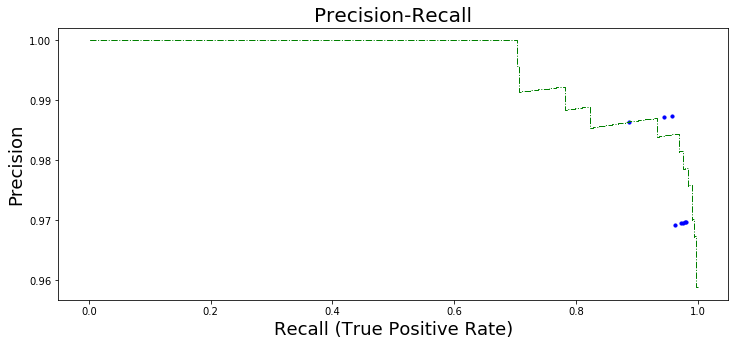

In [50]:
print(str(len(clf.rules_)) + ' rules have been built.')
print('The 5 most precise rules are the following:')
for rule in clf.rules_[:5]:
    print(rule[0])
    print('')

curves = [roc_curve, precision_recall_curve]
xlabels = ['False Positive Rate', 'Recall (True Positive Rate)']
ylabels = ['True Positive Rate (Recall)', 'Precision']


fig, axe = plt.subplots(1, 1, figsize=(12, 5))

ax = axe
precision, recall, _ = precision_recall_curve(y_test1, scoring)
precision_rf, recall_rf, _ = precision_recall_curve(y_test1, scoring_rf)
ax.scatter(recall[1:-1], precision[1:-1], c='b', s=10,
           label="rules of SkopeRules")
ax.step(recall_RF, precision_RF, linestyle='-.', c='g', lw=1, where='post',
        label="Random Forest")
ax.set_title("Precision-Recall", fontsize=20)
ax.set_xlabel('Recall (True Positive Rate)', fontsize=18)
ax.set_ylabel('Precision', fontsize=18)
plt.show()

Precision = True Positives / (True Positives + False Positives)

Recall = True Positives / (True Positives + False Negatives)

The Precision-Recall curve shows the performance of the rules generated by SkopeRules the (the blue points) and the performance of the Random Forest classifier fitted above. Each blue point represents the performance of a set of rules: Starting from the left on the precision-recall cruve, the kth point represents the score associated to the concatenation (union) of the k first rules, etc. Thus, each blue point is associated with an interpretable classifier, which is a combination of a few rules. In terms of performance, each of these interpretable classifiers compare well with Random Forest, while offering complete interpretation.

The accuracy obtained with this model :

In [96]:
print(f1_score(y_predSR, y_test1, average=None))

99.983707 97.466468


**One-o-one predictions with SkopeRules**
---

* **Optimization parameters**

*In the RandomForest section, we've proceed to cross-validation in order to find the best parameters. In the following section, we re-use those parameters to run the SkopeRules method.
Let's remind :*



|   Checks   |   max_features |   max_depth |    
|----------------------|--------------------|----------------------------------|
| Check1    |      0.55          |    6  |   
| Check2     |       0.55        |       7    |
| Check3     |        0.775       |     7      |
| Check4     |         0.775      |        7   |
| Check5     |        0.325       |        7   |
| Check6     |      0.775         |       7   |
| Check7     |          0.775     |    7       |
| Check8     |          0.55     |         4  |

* **Predictions with SkopeRules**

In [91]:
import time 
from skrules import SkopeRules 

scoresSR = []
timesSR = []
best_param # contains the optimized parameters
confusion = []

for k in range(len(XYtrain_pairs)) :
    t0 = time.time()
    
    clf = SkopeRules(
    max_depth_duplication=3, max_depth =best_param[k]['max_depth'] ,max_features=0.5,
    max_samples_features= best_param[k]['max_features'] , n_estimators=20,
    feature_names=XYtest_pairs[k][0].columns, recall_min=0.04, precision_min=0.6)
    
    clf.fit(XYtrain_pairs[k][0], XYtrain_pairs[k][1])
    y_predSR = clf.predict(XYtest_pairs[k][0])
    confusion.append(confusion_matrix(XYtest_pairs[k][1], y_predSR))
    t1 = time.time() - t0
    timesSR.append(t1)
    scoresSR.append(f1_score(y_predSR, XYtest_pairs[k][1], average=None))
    
    

In [93]:
precision = [confusion[k][1][1]/(confusion[k][1][1]+confusion[k][0][1]) for k in range(len(confusion)) ]
recall = [confusion[k][1][1]/(confusion[k][1][1]+confusion[k][1][0]) for k in range(len(confusion)) ]
precision_recall = [ (100*precision[k], 100*recall[k]) for k in range(len(confusion))]

In [94]:
cat_sort = np.sort(y_test1.unique())

trainSF = {'1Category' : cat_sort, 
     'Acc_Check_1' : scoresSR[0]*100,
     'Acc_Check_2' : scoresSR[1]*100,
     'Acc_Check_3' : scoresSR[2]*100,
     'Acc_Check_4' : scoresSR[3]*100,
     'Acc_Check_5' : scoresSR[4]*100,
     'Acc_Check_6' : scoresSR[5]*100,
     'Acc_Check_7' : scoresSR[6]*100,
     'Acc_Check_8' : scoresSR[7]*100
          } 
savSFdf = pd.DataFrame(trainSF) 

timeSF = {'' : [0], 
     'Time_Check_1' : timesSR[0],
     'Time_Check_2' : timesSR[1],
     'Time_Check_3' : timesSR[2],
     'Time_Check_4' : timesSR[3],
     'Time_Check_5' : timesSR[4],
     'Time_Check_6' : timesSR[5],
     'Time_Check_7' : timesSR[6],
     'Time_Check_8' : timesSR[7]
          } 
conf = {'' : ['precision', 'recall'],
     'Check_1' : precision_recall[0],
     'Check_2' : precision_recall[1],
     'Check_3' : precision_recall[2],
     'Check_4' : precision_recall[3],
     'Check_5' : precision_recall[4],
     'Check_6' : precision_recall[5],
     'Check_7' : precision_recall[6],
     'Check_8' : precision_recall[7]
          } 
confdf = pd.DataFrame(conf)
 
timeSFdf = pd.DataFrame(timeSF)
display(savSFdf)
display(timeSFdf)
display(confdf)

1Category  Acc_Check_1  Acc_Check_2  Acc_Check_3  Acc_Check_4  Acc_Check_5  \
0        0.0    99.983707    99.445654    99.894671    99.217241     99.89151   
1        1.0    97.466468    85.992996    96.674877    93.386169     91.36000   

   Acc_Check_6  Acc_Check_7  Acc_Check_8  
0    96.180967    98.803760    99.951579  
1    91.042321    46.931408    95.435685

Time_Check_1  Time_Check_2  Time_Check_3  Time_Check_4  Time_Check_5  \
0  0      30.12124     39.901219     45.594035     42.524722     40.678884   

   Time_Check_6  Time_Check_7  Time_Check_8  
0     53.573215     71.374897     25.822753

Check_1    Check_2    Check_3    Check_4    Check_5  \
0  precision   95.05814  76.570156  96.378146  87.810504  90.063091   
1     recall  100.00000  98.060468  96.973440  99.717913  92.694805   

     Check_6    Check_7    Check_8  
0  87.870215  76.696165  92.592593  
1  94.452029  33.810143  98.458904

* **Conclusion on Skope Rules**

Skope Rules method is the first interpretable method in this part, among the three tested, that give high accuracy regarding anomalies detection.
What we can see is a very low recall for the Check7 : only one third of the anomalies are detected in that case.. For the other checks, the values of f1-score are acceptable : more than 90% of the anomalies are detected, with a 100% recall for Check1.

----

# **Conclusion**

To conclude we have taken two different approaches to tackle the anomaly detection issue.

* As we were dealing with supervised learning, we firstly try to apply common classification algorithms, KNN, Decision Trees and Random Forests. The second, while being really highly interpretable, causes some overfit issues when the dataset becomes too large. Random Forest doesn't show those limitations but it isn't as easily interpretable .

* We then focus on rule based algorithms. Skope Rules gives really relevant results while combining the interpretability of Decision Trees and the performance of Random Forests.

The choice of a model, when considering the accuracy metrics, is highly correlated to the end application.

# ***Bibliography*** 

[1] Nicholas Goix. Machine Learning and Extremes for Anomaly Detection. Doctoral dissertation, Telecom ParisTech, 2016. Web. 30 May 2019. (https://ngoix.github.io/thesis.pdf)

[2] Hans-Peter Kriegel, Peer Kröger & Arthur Zimek. *Outlier Detection Techniques*. 16th ACM SIGKDD Conference on Knowledge Discovery and Data Mining, Ludwig-Maximilians-Universität München, 2010. Web (https://imada.sdu.dk/~zimek/publications/KDD2010/kdd10-outlier-tutorial.pdf)

[3] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. web http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

[4] Sanjay Chawla & Varun Chandola. *Anomaly Detection: Theory and Applications*. Tutorial program, ICDM IEEE International Conference on Data Mining series, University of Sydney, 2011. Web. 30 May 2019. (http://webdocs.cs.ualberta.ca/~icdm2011/downloads/ICDM2011_anomaly_detection_tutorial.pdf) 

[5] Molnar, Christoph. "Interpretable machine learning. A Guide for Making Black Box Models Explainable", 2019. https://christophm.github.io/interpretable-ml-book/.

[6] Mark Schwabacher, Robert Aguilar & Fernando Figueroa. *Using Decision Trees to Detect and Isolate Simulated Leaks in the J-2X Rocket Engine*, IEEE Aerospace conference, NASA Ames Research Center, 2009

[7] William W. Cohen. *Fast Effective Rule Induction*. ML95 Machine Learning: Proceedings of the Twelfth International Conference, 1995. Web (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.107.2612&rep=rep1&type=pdf)

[8] Tong Wang et al.. *A Bayesian Framework for Learning Rule Sets for Interpretable Classification*. Journal of Machine Learning Research 18 (2017) 1-37. Web (http://jmlr.org/papers/volume18/16-003/16-003.pdf)
